In [2]:
!pip install yfinance==0.2.44 numpy pandas scikit-learn tensorflow pandas_ta

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 20.3 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 5.3 MB/s eta 0:00:00
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=28ce35786665a2f6ac61d9c47b702bd1e1af32063c3b19cb4eb3fae80bc42078
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
  Created wheel for peewee: filename=peewee-3.17.7-cp310-cp310-linux_x86_64.whl size=300451 sha256=86233e329f82f1ec251b16b85846dfcbadc58304413d37bbcf35f1ea988c9774
  Stored in directory: /root/.cache/pip/wheels/8d/0e/f8/48eb93a200fca4c502d7590613616fa4d2c9533f7308f9e28a
Successfully built pandas_ta peewee


In [3]:
import yfinance as yf
import pandas as pd

# Download historical data for multiple stocks
stock_symbols = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'JPM', 'JNJ', 'V',
    'PG', 'UNH', 'DIS', 'MA', 'HD', 'PYPL', 'BAC', 'XOM', 'KO', 'PFE',
    'PEP', 'NFLX', 'CSCO', 'ABT', 'MRK', 'INTC', 'VZ', 'CVX', 'MCD', 'WMT',
    'BMY', 'IBM', 'C', 'NKE', 'T', 'ORCL', 'CRM', 'HON', 'BA',
    'AMGN', 'UPS', 'COST', 'LLY', 'WFC', 'MDT', 'DHR', 'TXN', 'LMT', 'GS'
]

# Download historical adjusted closing prices
data = yf.download(stock_symbols, start="2004-01-01", end="2024-01-01")['Adj Close']

# Calculate correlation matrix
correlation_matrix = data.corr()

# Sort the correlation matrix by the 'AAPL' column
sorted_correlation = correlation_matrix['AAPL'].sort_values(ascending=False)

# Print the sorted correlation values
print(sorted_correlation)


[*********************100%***********************]  49 of 49 completed


Ticker
AAPL     1.000000
MSFT     0.990276
COST     0.986885
UNH      0.973383
DHR      0.972768
GOOGL    0.971393
PG       0.962954
TXN      0.959816
UPS      0.957076
WMT      0.957019
HD       0.956130
ORCL     0.955141
ABT      0.952237
PEP      0.949062
MA       0.948286
TSLA     0.946402
MCD      0.946379
LLY      0.930886
V        0.929292
JPM      0.926749
NVDA     0.926083
MRK      0.920231
NKE      0.920166
AMZN     0.916962
HON      0.913989
GS       0.910504
CRM      0.909070
JNJ      0.906887
KO       0.905439
AMGN     0.904372
LMT      0.903087
CSCO     0.893242
PFE      0.870923
NFLX     0.849612
CVX      0.844068
MDT      0.806477
BMY      0.802590
META     0.799381
DIS      0.720340
INTC     0.719229
VZ       0.710586
XOM      0.676308
T        0.660919
IBM      0.612435
WFC      0.579133
BA       0.556136
BAC      0.454856
PYPL     0.452934
C       -0.353525
Name: AAPL, dtype: float64


In [20]:
import yfinance as yf
import pandas as pd

def calculate_sma(data, window):
    return data.rolling(window=window).mean()

def calculate_ema(data, window):
    return data.ewm(span=window, adjust=False).mean()

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def download_and_merge_stocks_with_tech(stock_symbols, start_date='1996-01-01', end_date='2024-10-10'):
    stock_dataframes = []

    for idx, stock in enumerate(stock_symbols):
        data = yf.download(stock, start=start_date, end=end_date)
        print(f"Downloaded data for {stock}:")
#         print(data.head())  # Debug: Check the first few rows of each stock's data

        stock_label = f'Stock{idx + 1}'
        data = data[['Open', 'Close', 'Volume', 'Adj Close']].rename(columns={
            'Open': f'Open_{stock_label}',
            'Close': f'Close_{stock_label}',
            'Volume': f'Volume_{stock_label}',
            'Adj Close': f'Adj_Close_{stock_label}'
        })

        # Calculate technical indicators manually
        data[f'{stock_label}_SMA_20'] = calculate_sma(data[f'Close_{stock_label}'], window=20)
        data[f'{stock_label}_EMA_20'] = calculate_ema(data[f'Close_{stock_label}'], window=10)
        data[f'{stock_label}_RSI'] = calculate_rsi(data[f'Close_{stock_label}'], window=14)

        stock_dataframes.append(data)

    # Merging all stock data into a single dataframe
    merged_data = stock_dataframes[0]
    for df in stock_dataframes[1:]:
        merged_data = pd.merge(merged_data, df, left_index=True, right_index=True)

    # Check the merged data shape before dropping NaN
    print(f"Shape after merging stock data: {merged_data.shape}")

    # Handle missing data: Try not dropping rows aggressively
    merged_data.fillna(method='ffill', inplace=True)  # Forward fill missing values

    # Check final data
    print(f"Final data shape after handling missing values: {merged_data.shape}")

    return merged_data

# Example stock symbols
# stock_symbols = ['ADANIPORTS.NS', 'BPCL.NS', 'ONGC.NS']
stock_symbols = ['ADANIPORTS.NS','CESC.NS' ,'ONGC.NS', 'BPCL.NS','IOC.NS','RELIANCE.NS','HINDPETRO.NS','GAIL.NS','TCS.NS']
# stock_symbols=['JPM','C','BAC']
# Download the stock data and add technical indicators
data_with_tech = download_and_merge_stocks_with_tech(stock_symbols)
def add_financial_indicators(data):
    for idx, stock in enumerate(stock_symbols):
        stock_label = f'Stock{idx + 1}'

        # Calculate financial indicators (mocked for demonstration)
        
        # Price-to-Earnings Ratio (P/E Ratio) approximation
        data[f'{stock_label}_PE_Ratio'] = data[f'Close_{stock_label}'] / (data[f'Close_{stock_label}'].rolling(window=20).mean() + 1e-9)

        # Price-to-Book Ratio (P/B Ratio) approximation
        data[f'{stock_label}_PB_Ratio'] = data[f'Close_{stock_label}'] / (data[f'Close_{stock_label}'].rolling(window=50).min() + 1e-9)

        # Dividend Yield approximation (as a percent)
        data[f'{stock_label}_Dividend_Yield'] = (data[f'Close_{stock_label}'].rolling(window=30).std() / data[f'Close_{stock_label}']) * 100

    return data

# Add financial indicators to the data
data_with_tech_and_financial = add_financial_indicators(data_with_tech)

# View the first few rows to see the added financial indicators
print(data_with_tech_and_financial.head())
data_with_tech_and_financial.shape
# View the first few rows of the dataset
print(data_with_tech.head())
data=data_with_tech
data.shape

[*********************100%***********************]  1 of 1 completed


Downloaded data for ADANIPORTS.NS:


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded data for CESC.NS:
Downloaded data for ONGC.NS:


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded data for BPCL.NS:
Downloaded data for IOC.NS:


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded data for RELIANCE.NS:
Downloaded data for HINDPETRO.NS:


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded data for GAIL.NS:
Downloaded data for TCS.NS:
Shape after merging stock data: (4156, 63)
Final data shape after handling missing values: (4156, 63)
            Open_Stock1  Close_Stock1  Volume_Stock1  Adj_Close_Stock1  \
Date                                                                     
2007-11-27   154.000000    191.800003       27262365        174.525620   
2007-11-28   194.000000    177.000000       21958915        161.058594   
2007-11-29   181.000000    177.399994       25616715        161.422562   
2007-11-30   178.000000    185.800003       23047035        169.066010   
2007-12-03   187.949997    196.000000       14578850        178.347382   

            Stock1_SMA_20  Stock1_EMA_20  Stock1_RSI  Open_Stock2  \
Date                                                                
2007-11-27            NaN     191.800003         NaN    54.313477   
2007-11-28            NaN     189.109093         NaN    53.864605   
2007-11-29            NaN     186.980166      


/tmp/ipykernel_30/3708946595.py:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)  # Forward fill missing values


(4156, 90)

In [21]:
# Scale the features using MinMaxScaler
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input, Concatenate, Bidirectional, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create a DataFrame from the scaled data
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

print("Scaled data shape:", scaled_data.shape)

Scaled data shape: (4156, 90)


In [22]:
scaled_data.isna().sum()
scaled_data.dropna(inplace=True)

print("Scaled data shape:", scaled_data.shape)

Scaled data shape: (4107, 90)


In [23]:
# Function to create datasets
def create_dataset(data, time_step, num_stocks):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step - 1, 6:6 + num_stocks])  # Close prices for each stock
    return np.array(X), np.array(y)

# Create the dataset
time_step = 60
num_stocks = len(stock_symbols)
X, y = create_dataset(scaled_data.values, time_step, num_stocks)

In [24]:
# Split data into training, validation, and testing sets
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

In [25]:
import tensorflow as tf
def quantile_loss(q):
    def loss(y_true, y_pred):
        err = y_true - y_pred
        return tf.reduce_mean(tf.where(err >= 0, q * err, (q - 1) * err))
    return loss


In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,GRU,GlobalAveragePooling1D ,MultiHeadAttention, LSTM,Attention ,Dense, Dropout, Conv1D, MaxPooling1D,Bidirectional,TimeDistributed,Concatenate
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
n=int(len(stock_symbols)/4)
# Input layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
x_encoded = TimeDistributed(Dense(n, activation='linear'))(input_layer)  # Further reduce to 8 dimensions
x_encoded = TimeDistributed(Dense(8, activation='relu'))(x_encoded)
# Convolutional and LSTM layers
# x = (Conv1D(filters=64, kernel_size=7, activation='relu'))(x_encoded)
# x = MaxPooling1D(pool_size=4)(x)
# x_encoded= Bidirectional(LSTM(64, return_sequences=True))(input_layer)
x1 = LSTM(96, return_sequences=True)(x_encoded)
x1 = Dropout(0.2)(x1)
# x1 = Attention()([x1, x1])
# x1 = MultiHeadAttention(num_heads=3, key_dim=16)(x1, x1,x1)
# x=Concatenate([x,x1])

# x2 = Bidirectional(LSTM(64,return_sequences=True))(input_layer)
x2 = GRU(96, return_sequences=True)(input_layer)
x2 = Dropout(0.2)(x2)
x = Concatenate()([x1, x2])
# x1 = MultiHeadAttention(num_heads=3, key_dim=16)(x,x)

                                                 
x = LSTM(32, return_sequences=False)(x)
# x = GlobalAveragePooling1D()(x1)
x= Dropout(0.2)(x)
# x = LSTM(64, return_sequences=False)(x)
# x = Dropout(0.2)(x)
x = Dense(24, activation='relu')(x)

outputs = [Dense(1, name=f'stock_{i+1}_output')(x) for i in range(num_stocks)]

# Define the model with multiple outputs
model1 = Model(inputs=input_layer, outputs=outputs)
# Define the loss for each output using quantile_loss(0.5) for each stock
losses = {f'stock_{i+1}_output': Huber() for i in range(num_stocks)}

# Define the metrics for each stock's output (e.g., 'mse' for each stock)
metrics = {f'stock_{i+1}_output': ['mse'] for i in range(num_stocks)}

# Define the loss weights for each stock to give equal importance
loss_weights = {f'stock_{i+1}_output': 1/num_stocks for i in range(num_stocks)}

# Compile the model with the adjusted losses, metrics, and loss weights
model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=losses,                   # Custom losses for each output
    metrics=metrics,                # Custom metrics for each output
    loss_weights=loss_weights       # Equal weight for each output
)
model1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 60, 90)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_4  │ (None, 60, 2)     │        182 │ input_layer_2[0]… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_5  │ (None, 60, 8)     │         24 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 60, 96)    │     40,320 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_2 (GRU)         │ (None, 60, 96)    │     54,144 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 60, 96)    │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 60, 96)    │          0 │ gru_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 60, 192)   │          0 │ dropout_7[0][0],  │
│ (Concatenate)       │                   │            │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 32)        │     28,800 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32)        │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 24)        │        792 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_1_output      │ (None, 1)         │         25 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_2_output      │ (None, 1)         │         25 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_3_output      │ (None, 1)         │         25 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_4_output      │ (None, 1)         │         25 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_5_output      │ (None, 1)         │         25 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_6_output      │ (None, 1)         │         25 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_7_output      │ (None, 1)         │         25 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_8_output      │ (None, 1)         │         25 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                 

 Total params: 124,487 (486.28 KB)

 Trainable params: 124,487 (486.28 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, GlobalAveragePooling1D, MultiHeadAttention, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional, TimeDistributed, Concatenate
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

n = int(len(stock_symbols) / 4)

# Input layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
x_encoded = TimeDistributed(Dense(n, activation='linear'))(input_layer)
# x_encoded = TimeDistributed(Dense(8, activation='relu'))(x_encoded)

# Convolutional and LSTM layers
x = Conv1D(filters=64, kernel_size=7, activation='relu')(x_encoded)
x = MaxPooling1D(pool_size=4)(x)

x1 = LSTM(96, return_sequences=True)(x_encoded)
x1 = Dropout(0.2)(x1)

x2 = GRU(96, return_sequences=True)(x_encoded)
x2 = Dropout(0.2)(x2)

# Concatenate LSTM and GRU branches
x = Concatenate()([x1, x2])

# Multi-Head Attention
# x = MultiHeadAttention(num_heads=3, key_dim=16)(x, x,x)

# Separate LSTM and Dense layers for each output branch
outputs = []
for i in range(num_stocks):
    branch = LSTM(16, return_sequences=False)(x)  # LSTM layer for each branch
    branch = Dropout(0.2)(branch)
    branch = Dense(8, activation='relu')(branch)
    output = Dense(1, name=f'stock_{i+1}_output')(branch)  # Output for each stock
    outputs.append(output)

# Define the model with multiple outputs
model2 = Model(inputs=input_layer, outputs=outputs)

# Define the loss for each output using Huber loss
losses = {f'stock_{i+1}_output': Huber() for i in range(num_stocks)}

# Define the metrics for each stock's output (e.g., 'mse' for each stock)
metrics = {f'stock_{i+1}_output': ['mse'] for i in range(num_stocks)}

# Define the loss weights for each stock to give equal importance
loss_weights = {f'stock_{i+1}_output': 1 / num_stocks for i in range(num_stocks)}

# Compile the model with the adjusted losses, metrics, and loss weights
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=losses,
    metrics=metrics,
    loss_weights=loss_weights
)

model2.summary()


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 60, 90)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_18 │ (None, 60, 2)     │        182 │ input_layer_9[0]… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_58 (LSTM)      │ (None, 60, 96)    │     38,016 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_9 (GRU)         │ (None, 60, 96)    │     28,800 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_72          │ (None, 60, 96)    │          0 │ lstm_58[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_73          │ (None, 60, 96)    │          0 │ gru_9[0][0]       │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 60, 192)   │          0 │ dropout_72[0][0], │
│ (Concatenate)       │                   │            │ dropout_73[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_59 (LSTM)      │ (None, 32)        │     28,800 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_60 (LSTM)      │ (None, 32)        │     28,800 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_61 (LSTM)      │ (None, 32)        │     28,800 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_62 (LSTM)      │ (None, 32)        │     28,800 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_63 (LSTM)      │ (None, 32)        │     28,800 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_64 (LSTM)      │ (None, 32)        │     28,800 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_65 (LSTM)      │ (None, 32)        │     28,800 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_66 (LSTM)      │ (None, 32)        │     28,800 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_67 (LSTM)      │ (None, 32)        │     28,800 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_74          │ (None, 32)        │          0 │ lstm_59[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_75          │ (None, 32)        │          0 │ lstm_60[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_76          │ (None, 32)        │          0 │ lstm_61[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_77          │ (None, 32)        │          0 │ lstm_62[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 328,655 (1.25 MB)

 Trainable params: 328,655 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Separate target values for each stock
y_train_stocks = [y_train[:, i] for i in range(num_stocks)]
y_val_stocks = [y_val[:, i] for i in range(num_stocks)]
y_test_stocks = [y_test[:, i] for i in range(num_stocks)]

# Fit the model
history1 = model1.fit(
    X_train,
    y_train_stocks,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val_stocks),
    shuffle=True,
    callbacks=[early_stopping]
)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 3.4429e-04 - stock_1_output_mse: 0.0015 - stock_2_output_mse: 3.2446e-04 - stock_3_output_mse: 3.4675e-04 - stock_4_output_mse: 4.6670e-04 - stock_5_output_mse: 2.1273e-04 - stock_6_output_mse: 3.8040e-04 - stock_7_output_mse: 3.4495e-04 - stock_8_output_mse: 0.0017 - stock_9_output_mse: 9.8400e-04 - val_loss: 4.9082e-04 - val_stock_1_output_mse: 0.0032 - val_stock_2_output_mse: 3.5039e-04 - val_stock_3_output_mse: 4.1523e-04 - val_stock_4_output_mse: 4.9109e-04 - val_stock_5_output_mse: 0.0011 - val_stock_6_output_mse: 2.8823e-04 - val_stock_7_output_mse: 4.0044e-04 - val_stock_8_output_mse: 0.0018 - val_stock_9_output_mse: 7.3425e-04
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 3.2399e-04 - stock_1_output_mse: 0.0016 - stock_2_output_mse: 3.0880e-04 - stock_3_output_mse: 3.2128e-04 - stock_4_output_mse: 4.3866e-04 - stock_5_output_mse: 1.9792e-04 - stock_6_output_mse: 3.5763e-04 - stock_7_output_mse: 3.4216e

In [46]:
history2 = model2.fit(
    X_train,
    y_train_stocks,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val_stocks),
    shuffle=True,
    callbacks=[early_stopping]
)

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 29s 66ms/step - loss: 0.0106 - stock_1_output_mse: 0.0615 - stock_2_output_mse: 0.0061 - stock_3_output_mse: 0.0074 - stock_4_output_mse: 0.0023 - stock_5_output_mse: 0.0036 - stock_6_output_mse: 0.0063 - stock_7_output_mse: 0.0110 - stock_8_output_mse: 0.0584 - stock_9_output_mse: 0.0346 - val_loss: 0.0105 - val_stock_1_output_mse: 0.0247 - val_stock_2_output_mse: 0.0118 - val_stock_3_output_mse: 0.0137 - val_stock_4_output_mse: 0.0034 - val_stock_5_output_mse: 0.0033 - val_stock_6_output_mse: 0.0076 - val_stock_7_output_mse: 0.0135 - val_stock_8_output_mse: 0.0408 - val_stock_9_output_mse: 0.0698
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0045 - stock_1_output_mse: 0.0234 - stock_2_output_mse: 0.0021 - stock_3_output_mse: 0.0021 - stock_4_output_mse: 0.0028 - stock_5_output_mse: 0.0012 - stock_6_output_mse: 0.0024 - stock_7_output_mse: 0.0025 - stock_8_output_mse: 0.0301 - stock_9_output_mse: 0.0136 - val_loss: 0.0074 - val_

In [50]:
import pandas as pd

# Function to evaluate metrics and store results in a DataFrame
def evaluate_metrics_table(y_test, y_pred, stock_name, metrics_df):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Create a temporary DataFrame to hold the new row of results
    temp_df = pd.DataFrame({
        'Stock': [stock_name],
        'R-squared': [r2],
        'MSE': [mse],
        'MAE': [mae]
    })
    
    # Concatenate the new row with the existing metrics_df
    metrics_df = pd.concat([metrics_df, temp_df], ignore_index=True)
    
    return metrics_df

# Initialize an empty DataFrame to store metrics for each stock
metrics_df1 = pd.DataFrame(columns=['Stock', 'R-squared', 'MSE', 'MAE'])
metrics_df2 = pd.DataFrame(columns=['Stock', 'R-squared', 'MSE', 'MAE'])

# Make predictions for the test set
y_pred_stocks1 = model1.predict(X_test)
y_pred_stocks2 = model2.predict(X_test)
# Evaluate metrics for each stock and store them in the DataFrame
for i in range(num_stocks):
    metrics_df1 = evaluate_metrics_table(y_test_stocks[i], y_pred_stocks1[i], f'Stock_{i+1}', metrics_df1)
print("model-1")
# Display the metrics as a table
print(metrics_df1)
for i in range(num_stocks):
    metrics_df2 = evaluate_metrics_table(y_test_stocks[i], y_pred_stocks2[i], f'Stock_{i+1}', metrics_df2)
print("model-2")
# Display the metrics as a table
print(metrics_df2)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
model-1
     Stock  R-squared       MSE       MAE
0  Stock_1   0.913952  0.002969  0.043566
1  Stock_2   0.884540  0.004592  0.043149
2  Stock_3   0.897878  0.004100  0.041538
3  Stock_4   0.889090  0.000649  0.014316
4  Stock_5   0.376094  0.026034  0.128860
5  Stock_6   0.917651  0.003486  0.037015
6  Stock_7   0.887899  0.004796  0.043660
7  Stock_8   0.980845  0.000630  0.019326
8  Stock_9   0.951341  0.002314  0.033121
model-2
     Stock  R-squared       MSE       MAE
0  Stock_1 -11.042922  0.415490  0.617105
1  Stock_2  -3.242769  0.168751  0.366952
2  Stock_3  -4.259416  0.211138  0.425571
3  Stock_4   0.084349  0.005356  0.043382
4  Stock_5  -4.768499  0.240704  0.447186
5  Stock_6  -9.692583  0.452625  0.628298
6  Stock_7  -9.829318  0.463334  0.644434
7  Stock_8  -9.500850  0.345112  0.558778
8  Stock_9 -11.694823  0.603582  0.731744


/tmp/ipykernel_30/4026769245.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, temp_df], ignore_index=True)
/tmp/ipykernel_30/4026769245.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, temp_df], ignore_index=True)


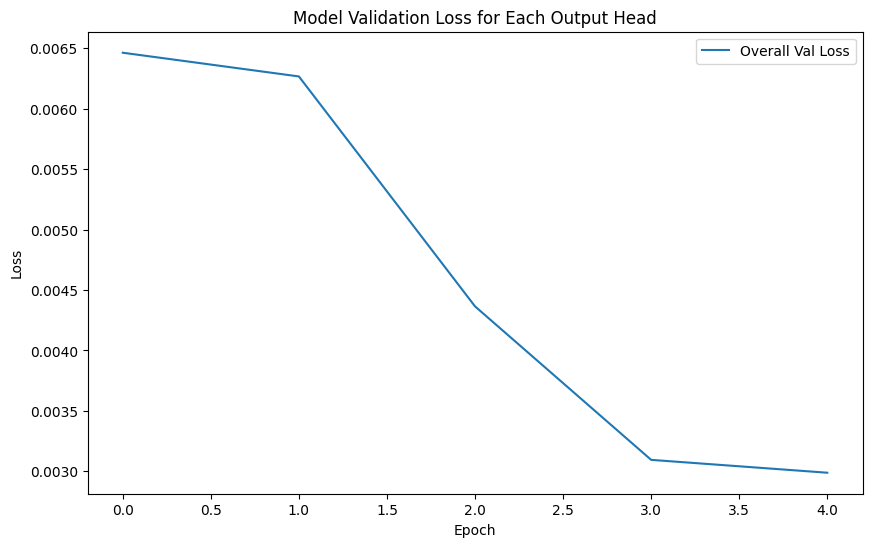

In [14]:
import matplotlib.pyplot as plt

# Extract keys related to validation loss from the history
val_loss_keys = [key for key in history.history.keys() if 'val_' in key and 'loss' in key]

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot overall validation loss first if present
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Overall Val Loss')

# Loop through each validation loss key and plot the loss for each stock output
for key in val_loss_keys:
    if key != 'val_loss':  # Exclude the overall validation loss, if plotted already
        stock_label = key.split('_output_')[0].replace('val_', '').title()  # Dynamically create stock labels
        plt.plot(history.history[key], label=f'{stock_label} Val Loss')

# Customize the plot
plt.title('Model Validation Loss for Each Output Head')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


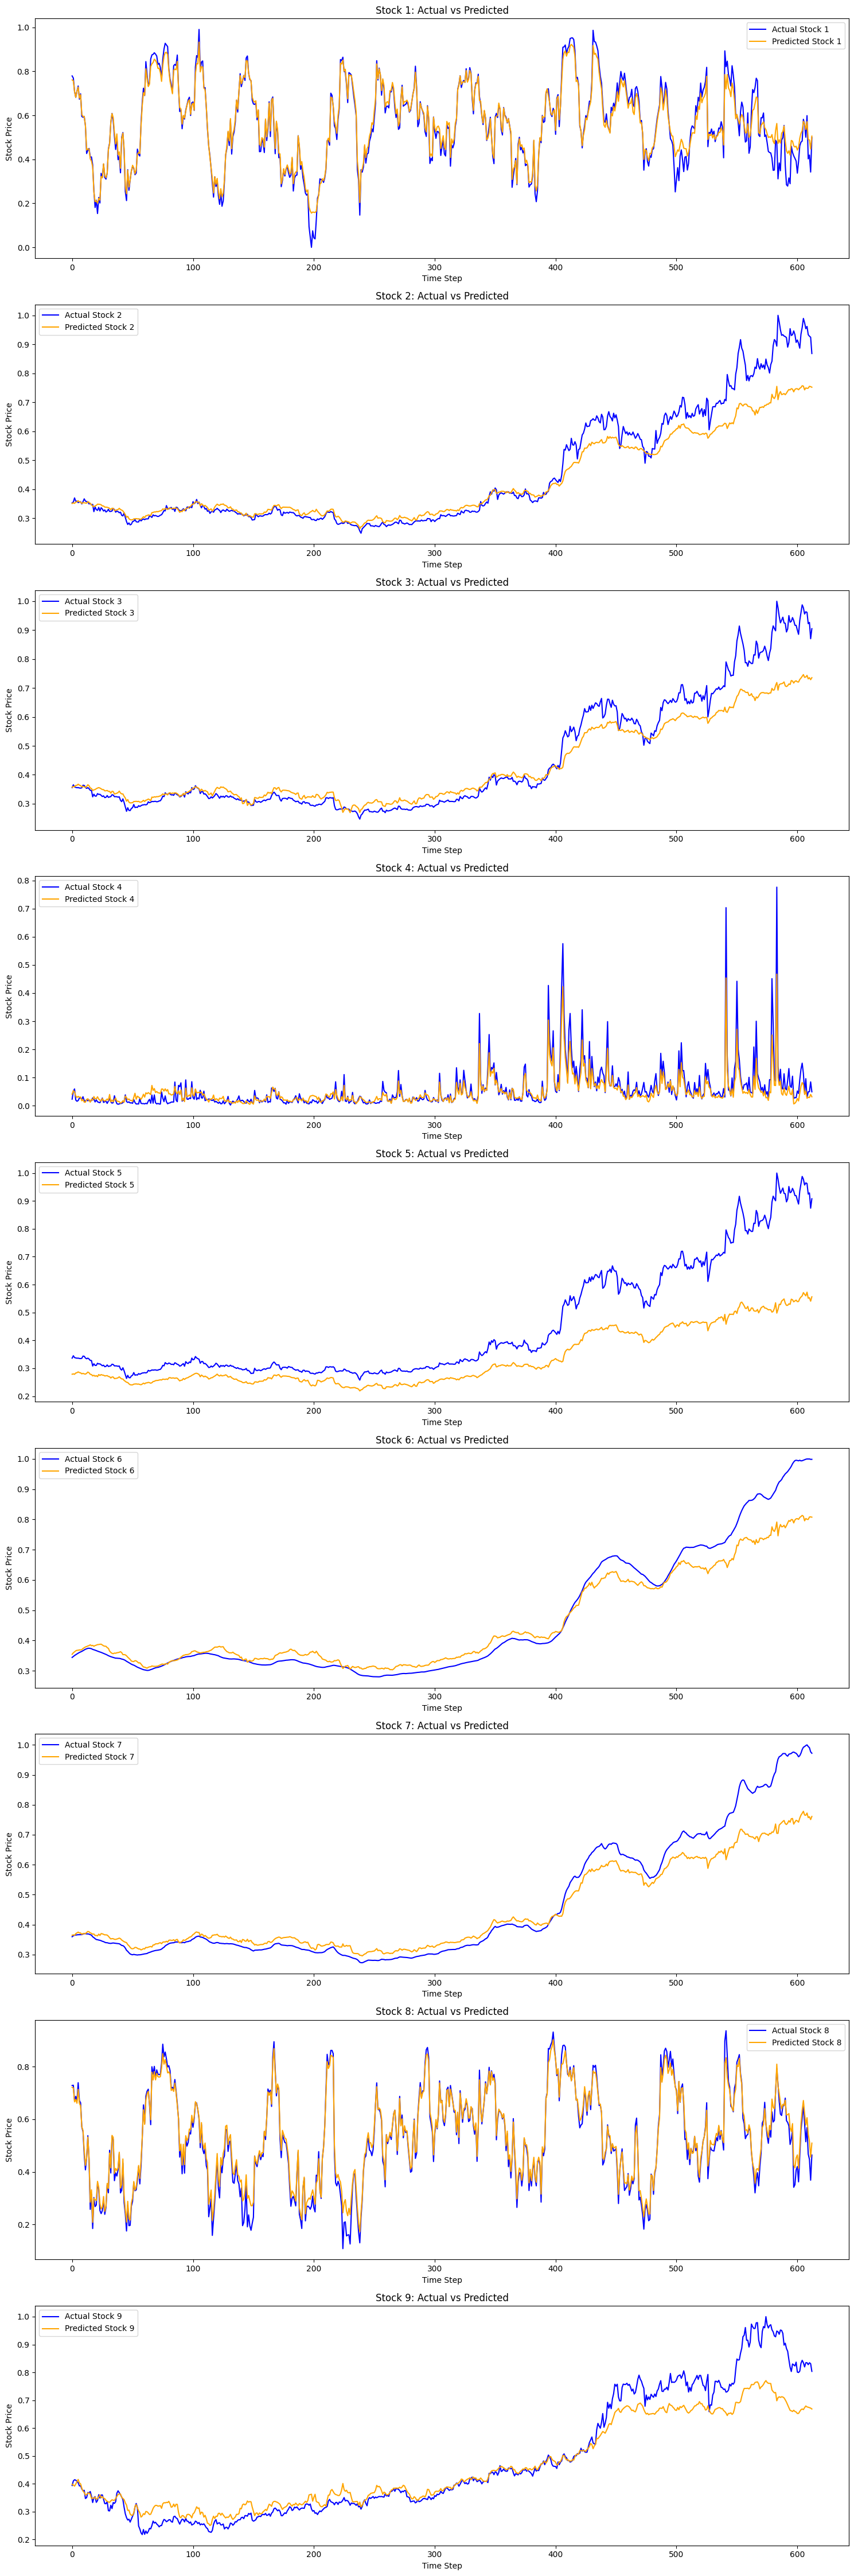

In [19]:
# Make predictions
predictions = model1.predict(X_test)

# Initialize the figure for plotting
plt.figure(figsize=(15, 5 * num_stocks))  # Adjust the height dynamically based on the number of stocks

# Loop through each stock and plot
for i in range(num_stocks):
    plt.subplot(num_stocks, 1, i + 1)  # Create subplot for each stock dynamically
    plt.plot(y_test_stocks[i], label=f'Actual Stock {i+1}', color='blue')
    plt.plot(predictions[i], label=f'Predicted Stock {i+1}', color='orange')
    plt.title(f'Stock {i+1}: Actual vs Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
model1.save("lstm_1_app7_80_noattention.h5")